# Project Title: Telecom Churn Analysis
## Introduction
### Import important libraries

In [53]:
import pandas as pd
import numpy as np
import sklearn
import scipy as sp
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                             HistGradientBoostingClassifier, AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


## Import and pre_processing the data

In [3]:
# load dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dropna(inplace=True)

# Drop columns with missing values
df.dropna(axis=1, inplace=True)

In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
if df.duplicated().sum() > 0:
        print("Warning: Duplicates found.")

In [9]:
df["customerID"].nunique()

7043

In [10]:
df = df.drop(columns=['customerID'])

In [11]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [12]:
encoder = OneHotEncoder(sparse_output=False)
df['Churn'] = encoder.fit_transform(df[['Churn']])

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,1.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,1.0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,1.0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,1.0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0.0


### Data Exploration
### We will perform exploratory data analysis (EDA) to understand the dataset.


In [14]:
fig = px.bar(df, x="Partner", y="PhoneService",color="PhoneService", title="Sample Bar Chart")
fig.show()

In [15]:
counts = df['InternetService'].value_counts().reset_index()
counts.columns = ['InternetService', 'Count']
fig = px.pie(counts,values='Count',names='InternetService', color='InternetService', title='Count of InternetService Categories')
fig.show()

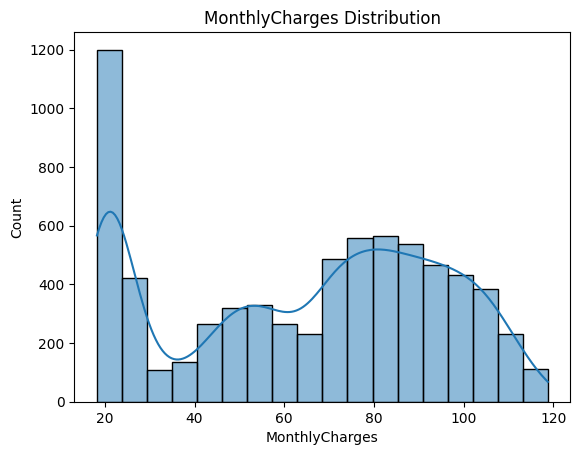

In [16]:
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("MonthlyCharges Distribution")
plt.show()

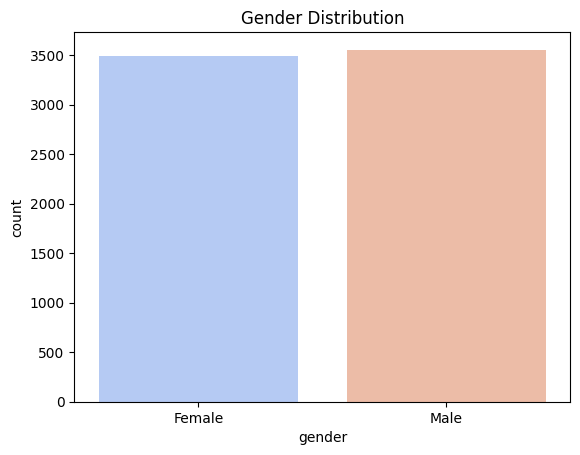

In [17]:
sns.countplot(x='gender', data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

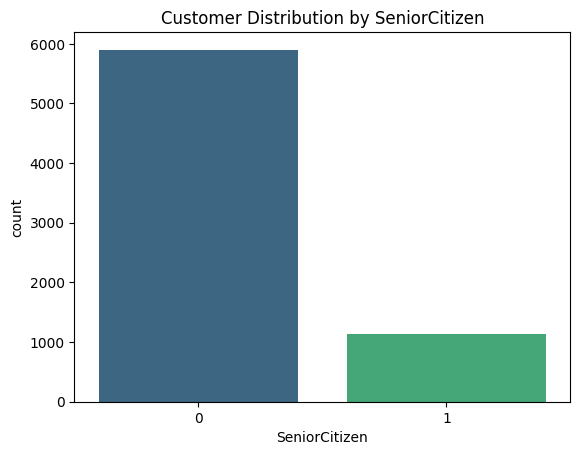

In [18]:
sns.countplot(x='SeniorCitizen', data=df,palette='viridis')
plt.title("Customer Distribution by SeniorCitizen")
plt.show()

In [19]:
fig2 = px.histogram(df, x="tenure")
fig2.show()

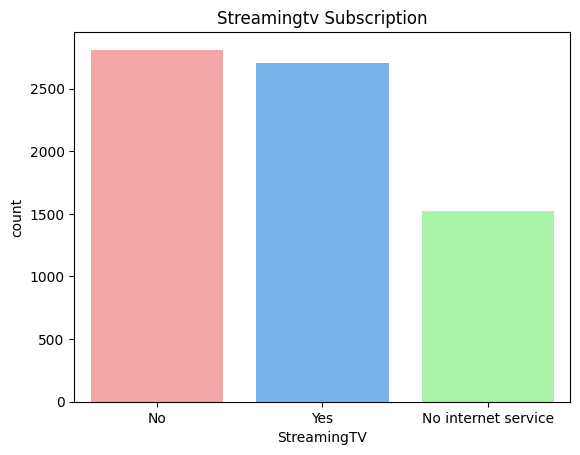

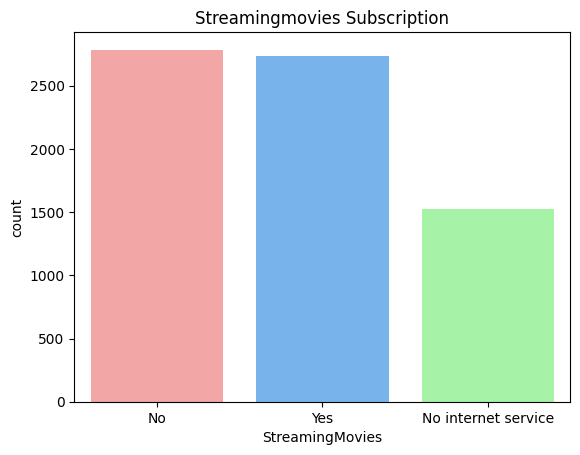

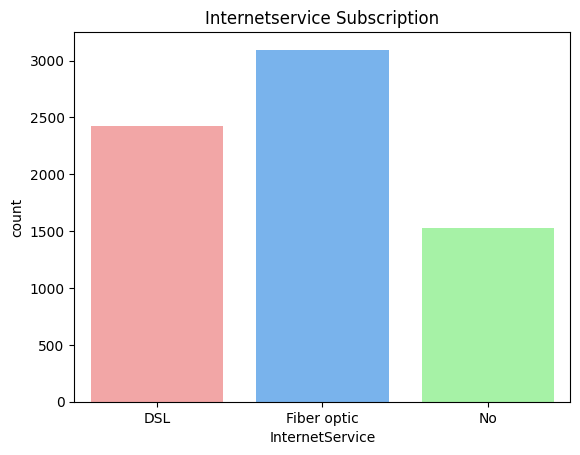

In [20]:
services = ["StreamingTV","StreamingMovies","InternetService"]
custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
for service in services:
    sns.countplot(x=service, data=df,palette=custom_palette)
    plt.title(f"{service.capitalize()} Subscription")
    plt.show()

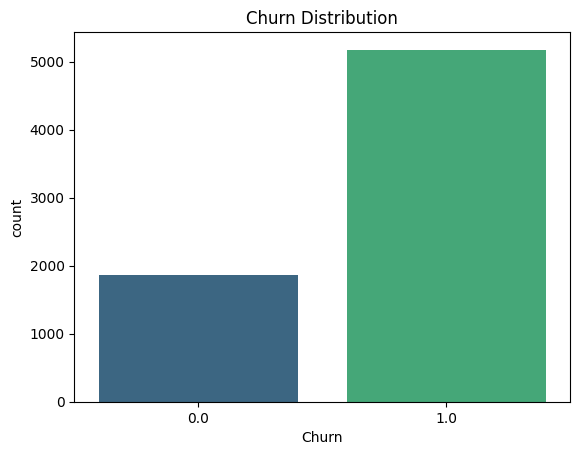

In [21]:
sns.countplot(x='Churn', data=df,palette='viridis')
plt.title("Churn Distribution")
plt.show()

In [22]:
fig3 = px.histogram(df, x='Contract',color='Contract')
fig3.show()

In [23]:
fig = px.bar(df,x="gender",color="StreamingMovies",color_discrete_sequence=custom_palette, barmode="group")
fig.show()

In [24]:
fig = px.bar(df,x="gender",color="TechSupport",  color_discrete_sequence=custom_palette, barmode="group")
fig.show()

Feature Engineering

In [25]:
#customer tenure:
print(df['tenure'].max())
df["Tenure_groups"]=pd.cut(df["tenure"],bins=[0,6,24,45,72],labels=["New","Regular","Loyal","Very_loyal"])

72


In [26]:
#customer tenure
df["Tenure_in_years"]=df["tenure"]/12

In [27]:
#customer charges
df['Total_Charges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df["Avg_years spending"]=df["Total_Charges"]/df["Tenure_in_years"]
df["Avg_monthly_spend"]=df["MonthlyCharges"]/df['tenure']


In [28]:
tenure_counts = df["Tenure_groups"].value_counts()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_groups,Tenure_in_years,Total_Charges,Avg_years spending,Avg_monthly_spend
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1.0,New,0.083333,29.85,358.200000,29.850
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,1.0,Loyal,2.833333,1889.50,666.882353,1.675
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0.0,New,0.166667,108.15,648.900000,26.925
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1.0,Loyal,3.750000,1840.75,490.866667,0.940
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0.0,New,0.166667,151.65,909.900000,35.350


In [29]:
group_new=df[df["Tenure_groups"]=="New"]["Churn"].astype("category").cat.codes
group_regular=df[df["Tenure_groups"]=="Regular"]["Churn"].astype("category").cat.codes
group_loyal=df[df["Tenure_groups"]=="Loyal"]["Churn"].astype("category").cat.codes
group_very_loyal=df[df["Tenure_groups"]=="Very_loyal"]["Churn"].astype("category").cat.codes
## Anova_test
f_stat,p_value=f_oneway(group_new,group_regular,group_loyal,group_very_loyal)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

## dividing the data acoorint to the contract
group_monthly = df[df["Contract"] == "Month-to-month"]["Churn"]
group_one_year = df[df["Contract"] == "One year"]["Churn"]
group_two_year = df[df["Contract"] == "Two year"]["Churn"]

## Anova test
f_stat, p_value = f_oneway(group_monthly, group_one_year, group_two_year)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 354.0924363661728, P-value: 3.700931106053063e-214
F-statistic: 711.7604625631104, P-value: 2.9921663019905003e-282


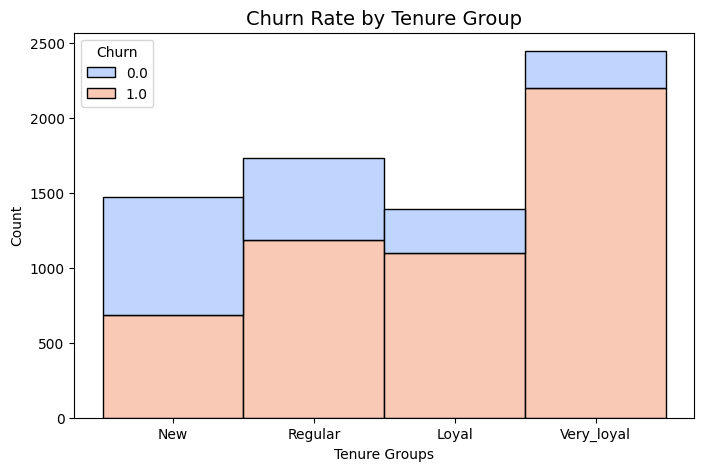

In [30]:
plt.figure(figsize=(8, 5))
df["Churn"].astype(int)
sns.histplot(x=df["Tenure_groups"], hue=df["Churn"], multiple="stack", palette="coolwarm")
plt.title("Churn Rate by Tenure Group", fontsize=14)
plt.xlabel("Tenure Groups")
plt.ylabel("Count")
plt.show()


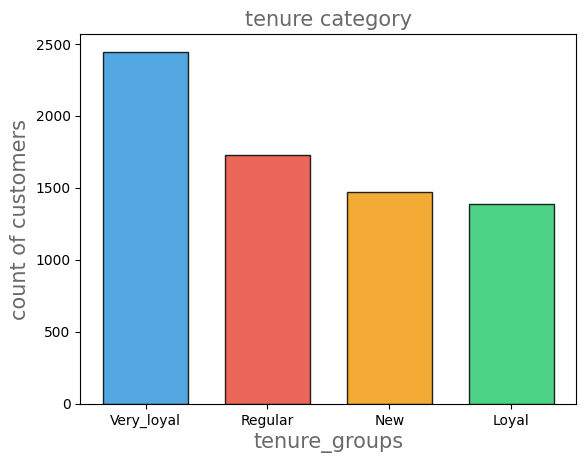

In [31]:
plt.bar(tenure_counts.index,height=tenure_counts.values,color=["#3498db", "#e74c3c", "#f39c12", "#2ecc71", "#9b59b6"], alpha=0.85,width=0.7,edgecolor="black")
plt.title("tenure category",size="15",color="dimgray")
plt.xlabel("tenure_groups",color="dimgray",size="15")
plt.ylabel("count of customers",color="dimgray",size="15")
plt.show()

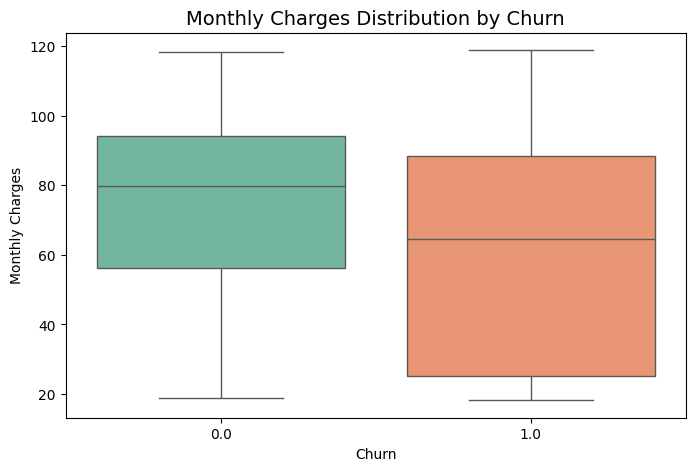

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")
plt.title("Monthly Charges Distribution by Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


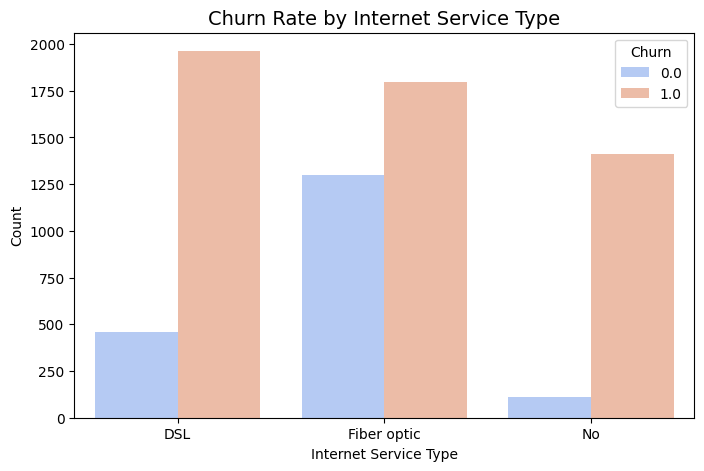

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="InternetService", hue="Churn", palette="coolwarm")
plt.title("Churn Rate by Internet Service Type", fontsize=14)
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()


Text(0.5, 0, 'tech support groups')

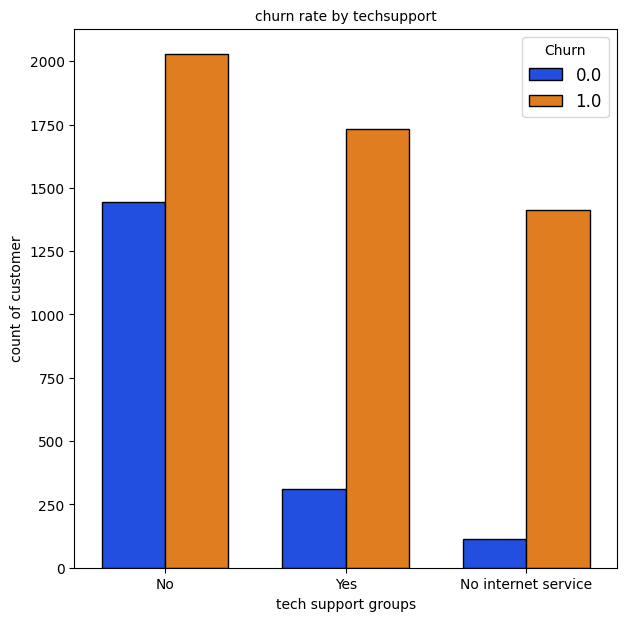

In [34]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x="TechSupport", hue="Churn",palette="bright",edgecolor="black",width=0.7)
plt.legend(fontsize=12,title="Churn",title_fontsize=10)
plt.title("churn rate by techsupport",size=10)
plt.ylabel("count of customer",size=10)
plt.xlabel("tech support groups",size=10)



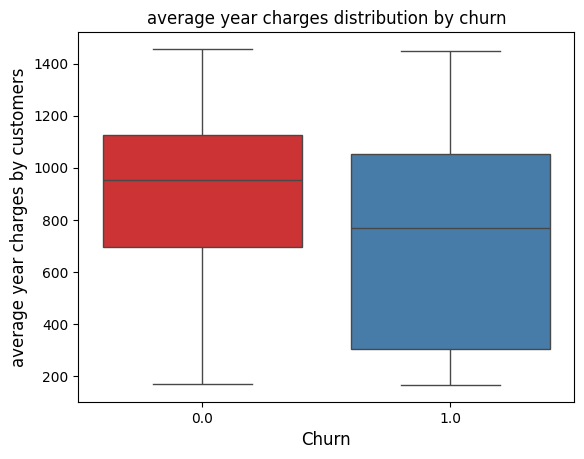

In [35]:
sns.boxplot(x="Churn" ,y="Avg_years spending",data=df,palette="Set1")
plt.title("average year charges distribution by churn")
plt.xlabel("Churn",size=12)
plt.ylabel("average year charges by customers",size=12)
plt.show()

Text(0.5, 1.0, 'Distribution by Payment_methods')

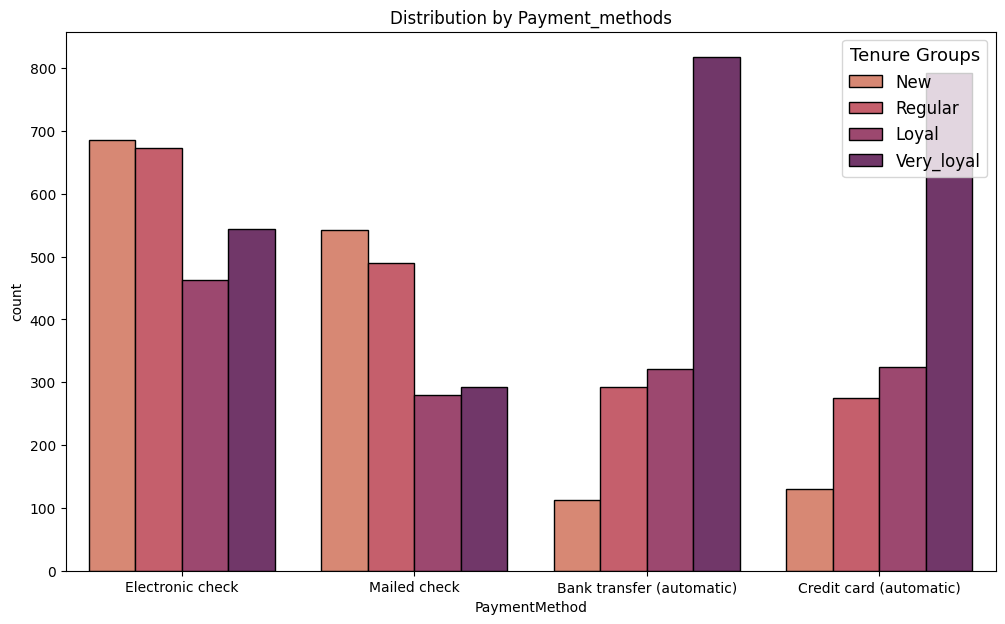

In [36]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="PaymentMethod",hue="Tenure_groups",palette="flare",edgecolor="black")
plt.legend(title="Tenure Groups", fontsize=12, title_fontsize=13, loc="upper right")
plt.title("Distribution by Payment_methods")

In [37]:
# convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [39]:
# drop missing values
df.dropna(inplace=True)


In [40]:
# summary dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.000000,0.000000,0.000000,0.000000,1.00
tenure,7032.0,32.421786,24.545260,1.000000,9.000000,29.000000,55.000000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.250000,35.587500,70.350000,89.862500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.80
Churn,7032.0,0.734215,0.441782,0.000000,0.000000,1.000000,1.000000,1.00
Tenure_in_years,7032.0,2.701816,2.045438,0.083333,0.750000,2.416667,4.583333,6.00
Total_Charges,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.80
Avg_years spending,7032.0,777.593083,362.230686,165.300000,434.158696,844.478868,1082.154717,1456.80
Avg_monthly_spend,7032.0,8.620087,16.352057,0.268056,1.277708,2.147286,6.611218,102.45


In [41]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Tenure_groups : ['New', 'Loyal', 'Regular', 'Very_loyal']
Categories (4, object): ['New' < 'Regular' < 'Loyal' < 'Very_loyal']


In [42]:
# check missing value
print(df.isnull().sum())

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
Tenure_groups         0
Tenure_in_years       0
Total_Charges         0
Avg_years spending    0
Avg_monthly_spend     0
dtype: int64


In [43]:
from sklearn.preprocessing import OneHotEncoder

# For newer scikit-learn (>=1.2):
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

if len(categorical_cols) > 0:
    # Apply OneHotEncoder (updated for newer scikit-learn)
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_data = encoder.fit_transform(df[categorical_cols])

    # Create encoded DataFrame
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

    # Drop original columns and concat
    df = df.drop(columns=categorical_cols)
    df = pd.concat([df, encoded_df], axis=1)
else:
    print("No categorical columns were found to encode.")

In [45]:
# Step 1: Properly identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 2: Check if they exist in DataFrame
available_cols = [col for col in categorical_cols if col in df.columns]

if not available_cols:
    print("No categorical columns to encode!")
    encoded_df = pd.DataFrame()  # Empty DataFrame
else:
    print(f"Encoding categorical columns: {available_cols}")
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_data = encoder.fit_transform(df[available_cols])
    encoded_df = pd.DataFrame(
        encoded_data,
        columns=encoder.get_feature_names_out(available_cols)
    )

No categorical columns to encode!


In [46]:
# rename churn_yes to churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [47]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [48]:
def clean_data(X, y):
    """Remove rows with NaN values in either features or target"""
    # Combine to find rows with any NaN
    combined = pd.concat([X, y], axis=1)
    clean_idx = combined.dropna().index

    return X.loc[clean_idx], y.loc[clean_idx]

# Clean both training and test sets
X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)
X,y=clean_data(X, y)

# Verify no NaN values remain
print("Remaining NaN in X_train:", X_train.isna().sum().sum())
print("Remaining NaN in y_train:", y_train.isna().sum())
print("Remaining NaN in X_test:", X_test.isna().sum().sum())
print("Remaining NaN in y_test:", y_test.isna().sum())
print(y.isna().sum(),X.isna().sum())

Remaining NaN in X_train: 0
Remaining NaN in y_train: 0
Remaining NaN in X_test: 0
Remaining NaN in y_test: 0
0 SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Tenure_in_years                          0
Total_Charges                            0
Avg_years spending                       0
Avg_monthly_spend                        0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet

In [66]:
# UpSampling
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6),
         'learning_rate': uniform(0.01, 0.2),
         'n_estimators': randint(100, 300),
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

       # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy: {:.3f}%".format(accuracy * 100))
    print()
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print(f"Model Pipeline: {best_model}")
print(f"Accuracy: {best_accuracy:.2%}")  # Proper percentage formatting

Model: Random Forest
Test Accuracy: 95.447%

Model: Gradient Boosting
Test Accuracy: 95.622%

Model: Support Vector Machine
Test Accuracy: 88.704%

Model: Logistic Regression
Test Accuracy: 88.704%

Model: K-Nearest Neighbors
Test Accuracy: 98.687%

Model: Decision Tree
Test Accuracy: 93.257%

Model: Ada Boost
Test Accuracy: 93.608%

Model: XG Boost
Test Accuracy: 96.235%

Model: Naive Bayes
Test Accuracy: 85.201%

Best Model:
Test Accuracy: 0.9868651488616462
Model Pipeline: KNeighborsClassifier(n_neighbors=3, weights='distance')
Accuracy: 98.69%



Confusion Matrix:
[[590   6]
 [  9 537]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       596
         1.0       0.99      0.98      0.99       546

    accuracy                           0.99      1142
   macro avg       0.99      0.99      0.99      1142
weighted avg       0.99      0.99      0.99      1142



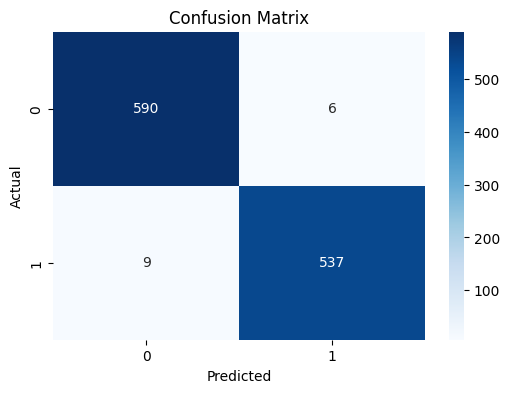

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best model
y_best_pred = best_model.predict(Xr_test)

# Confusion Matrix
cm = confusion_matrix(yr_test, y_best_pred)
print("\nConfusion Matrix:")
print(cm)

# Optional: Classification Report
print("\nClassification Report:")
print(classification_report(yr_test, y_best_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [68]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Sample data for demonstration
X = np.random.rand(100, 5)  # 100 samples, 5 features

# 1. Create and save a preprocessor (e.g., StandardScaler)
preprocessor = StandardScaler()
preprocessor.fit(Xr_train)  # Fit on some data

with open('scaler.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# 2. Create and save a K-means model (or another model)
k_model = KMeans(n_clusters=3, random_state=42)
k_model.fit(Xr_train)  # Fit on some data

with open('model_columns.pkl', 'wb') as f:
    pickle.dump(k_model, f)

print("Files 'preprocessor.pkl' and 'k_model.pkl' created successfully!")

Files 'preprocessor.pkl' and 'k_model.pkl' created successfully!
